# SI 618 Homework 8

### The total points for this assignment is 100

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The data:

* https://www.kaggle.com/terminus7/pokemon-challenge

> This data set contains two files.
> 
> pokemon.csv: 800 Pokemon, including their number, name, first and second type, basic stats: HP, Attack, Defense, Special Attack, Special Defense, the game generation they were introduced in, and whether they had the "legendary" status.
> 
> combats.csv: 50,000 simulated encounters between pairs of pokemon with the first pokemon to act, the other pokemon and the winner 

## Guidance

- Show your code
- <b>Explain your answer

In [169]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [191]:
combats = pd.read_csv("combats.csv")
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


### Q1. For 15 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). 

* Which abilities are most and least correlated?

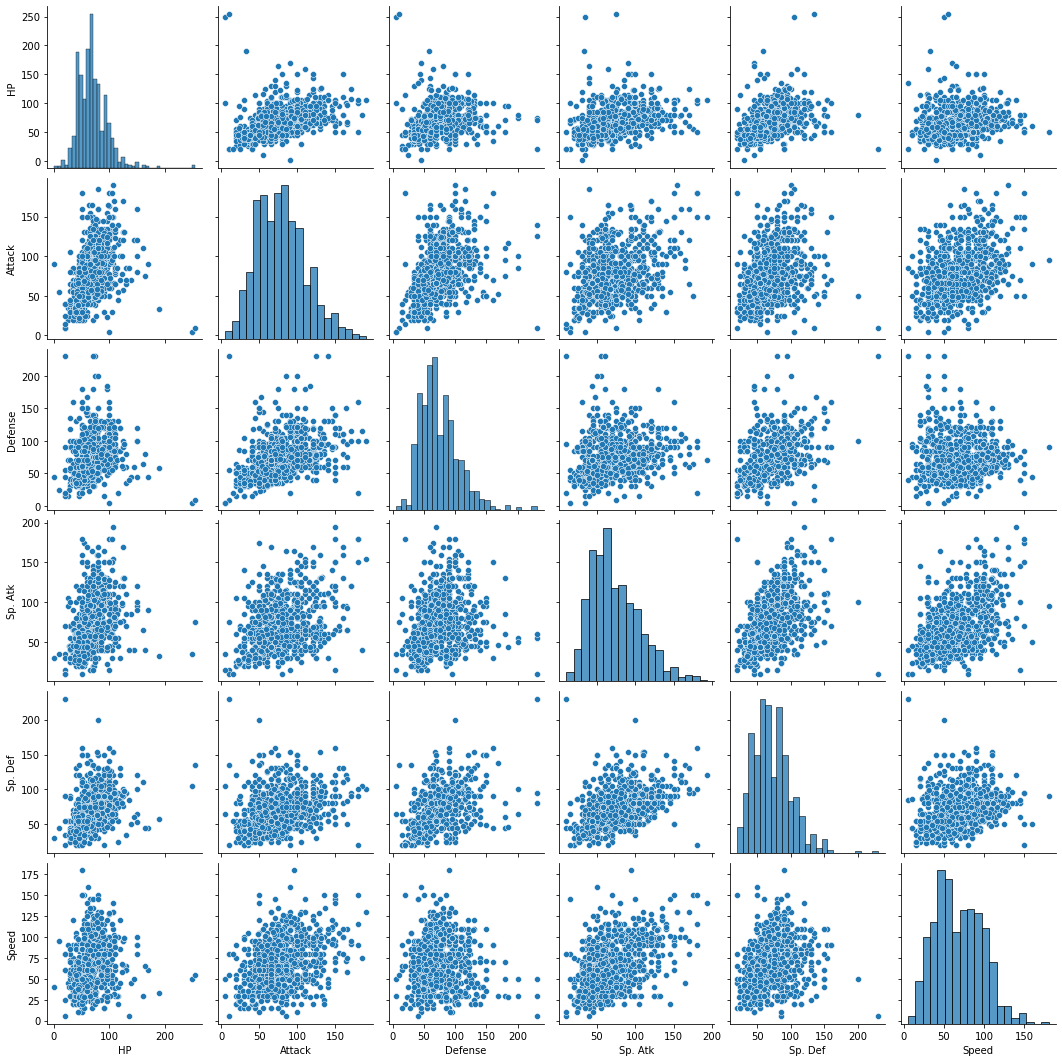

In [171]:
sns.pairplot(pokemon, 
             vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])

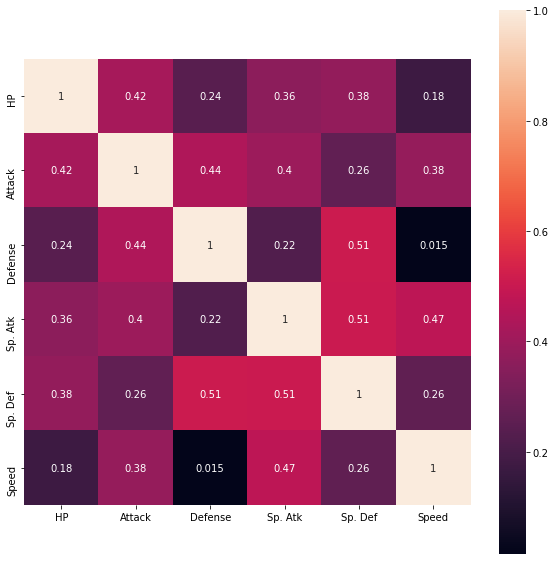

In [229]:
pokemon_part = pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
corr = pokemon_part.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, square = True)

According to the table of the correlation coefficient and heatmap above, we can assert that:
+ The abilities `Sp. Def` and `Defense` are most correlated.
+ The abilities `Speed` and `HP` are least correlated.

###  Q2. For 15 Points: Plot the distribution of ability points per Pokémon type 

* How would you describe each Pokémon type with different ability points as well as their overall ability score (sum of different abilities)? For simplicity, let's focus solely on pokemon that are type 1 (non-dual type pokemon)

In [173]:
pokemon["tot"] = pokemon["HP"] + pokemon["Attack"] + \
                 pokemon["Defense"] + pokemon["Sp. Atk"] + \
                 pokemon["Sp. Def"] + pokemon["Speed"]
type_list = list(set(pokemon["Type 1"]))
ability_list = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
ability_tot_list = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "tot"]

#### Distribution of ability points for each Pokémon type

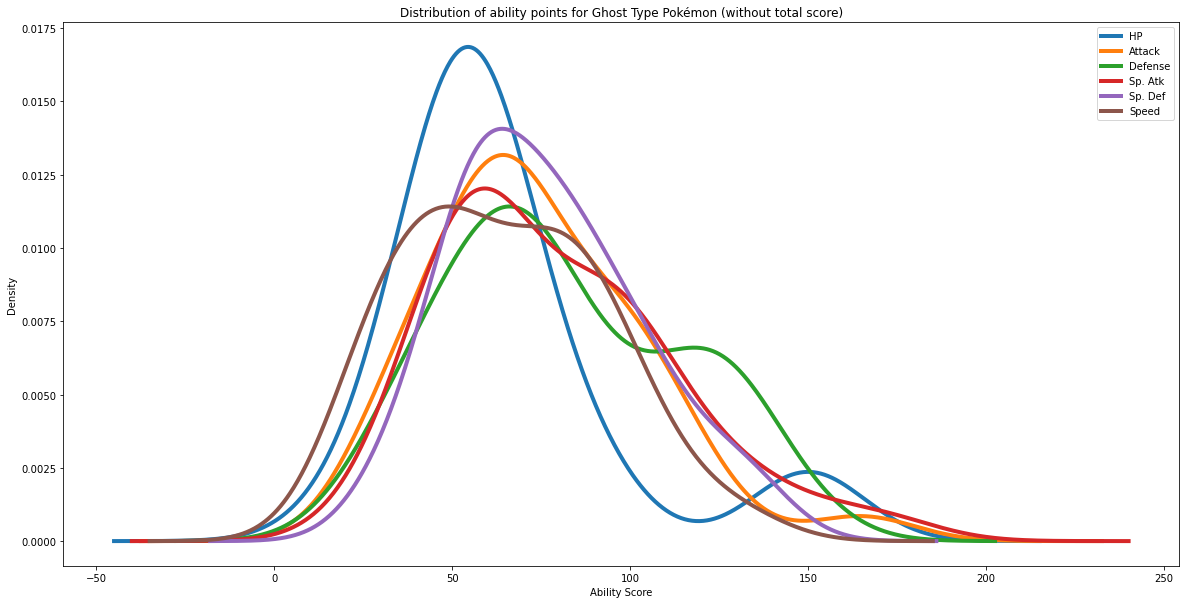

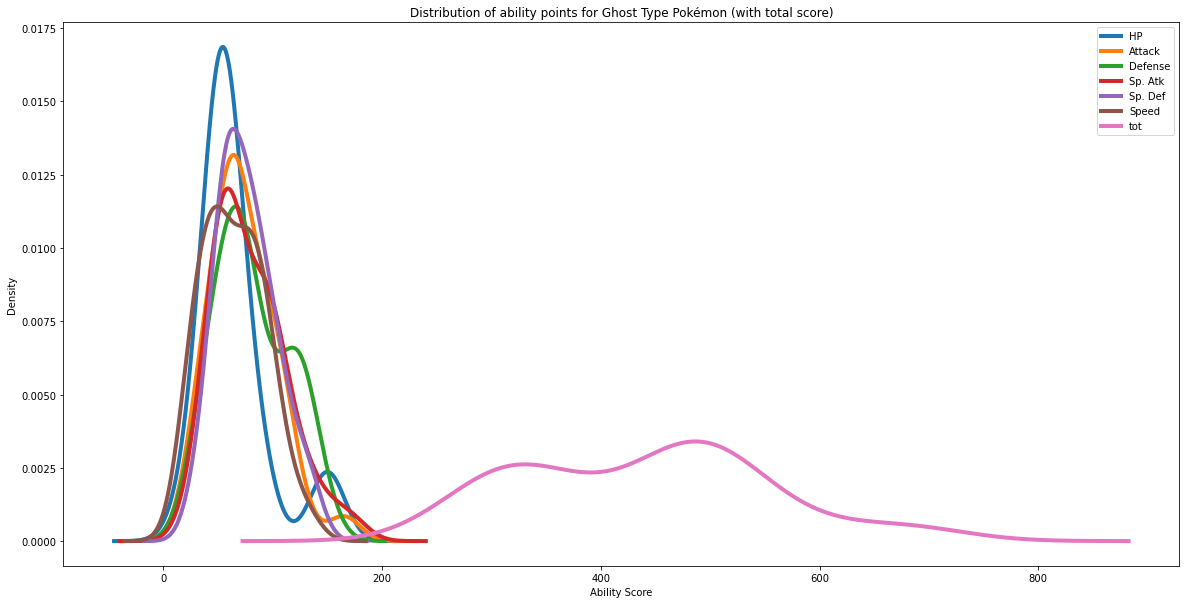

In [174]:
def ability_dist_per_type(pType):
    temp = pokemon[pokemon["Type 1"] == pType]
    temp[ability_list].plot.density(figsize = (20, 10), linewidth = 4)
    plt.xlabel("Ability Score")
    plt.title(f'Distribution of ability points for {pType} Type Pokémon (without total score)')
    
    temp[ability_tot_list].plot.density(figsize = (20, 10), linewidth = 4)
    plt.xlabel("Ability Score")
    plt.title(f'Distribution of ability points for {pType} Type Pokémon (with total score)')
    
ability_dist_per_type(type_list[0]) # example for Ghost type

According to the distribution of ability score above for the Ghost type Pokemon, we can figure out that:
+ Most `Ghost` type Pokemon have a fewer `HP` ability comparing to its other abilitys. However, some of them also have higher `HP` (since there is a second peak in the blue line)
+ Some `Ghost` type Pokemon also have a higher `Defense` ability (second peak in the green line)

We can perform similar analysis towards other Pokemon types (emitted here).

#### Distribution of same ability points for every Pokemon type

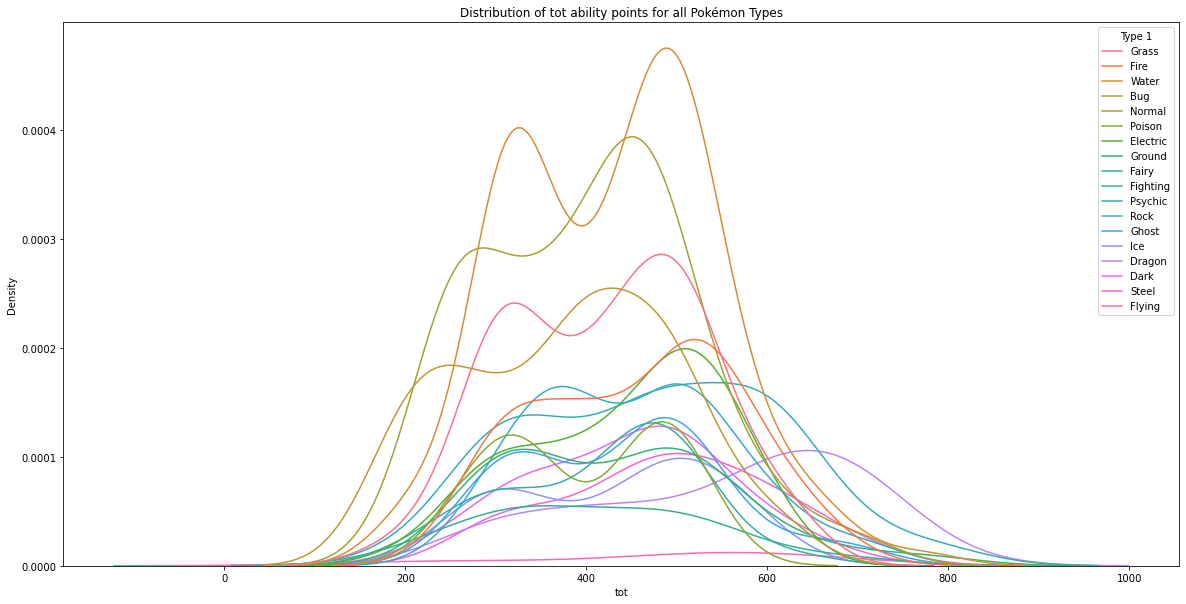

In [175]:
def ability_dist_all_types_kde(ability = "tot"):
    # plot the distribution of a given ability points for all Pokemon types with 
    # kde plot
    plt.figure(figsize=(20,10))
    ax = sns.kdeplot(data=pokemon, x=ability, hue="Type 1")
    ax.set_title(f"Distribution of {ability} ability points for all Pokémon Types")
    
ability_dist_all_types_kde()

Also, from the above example, we can see that `Gragon` type Pokemon has the largest overall ability score `tot` than the other types (since it has a higher peak at around 650 to 700), indicating that itnormally has a higher overall ability scores.

However, we can hardly draw any conclusion from the density plot above. Hence we consider the violin plot:

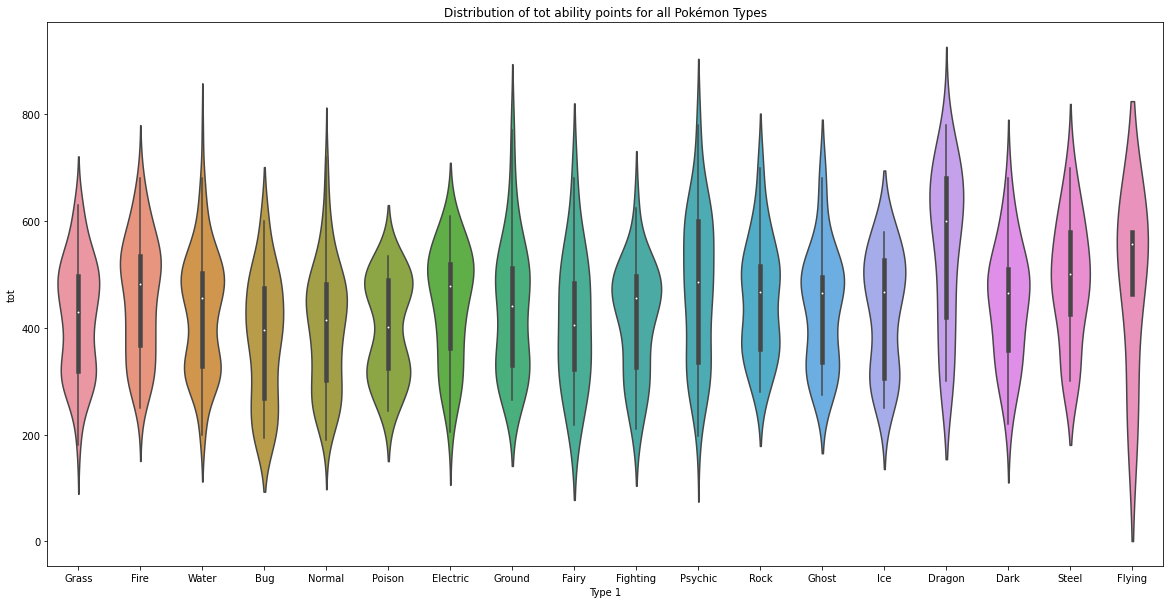

In [176]:
def ability_dist_all_types_violin(ability = "tot"):
    # plot the distribution of a given ability points for all Pokemon types with 
    # violin plot
    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x="Type 1", y=ability, data=pokemon)
    ax.set_title(f"Distribution of {ability} ability points for all Pokémon Types")
    
ability_dist_all_types_violin()

According to the violin plot above, we can see that it is obvious that `Dragon` type has the highest totoal ability score among all. 

#### Mosaic plots for binary ability scores for different Pokemon Type 

However, simply comparing the value of different abilities for a Pokemon Type is meaningless. Also, we can hardly draw any conclusion from those complex density plots. Hen I consider comparing each ability according to different Pokemon types to see if a type has  explicit higher ability score. 

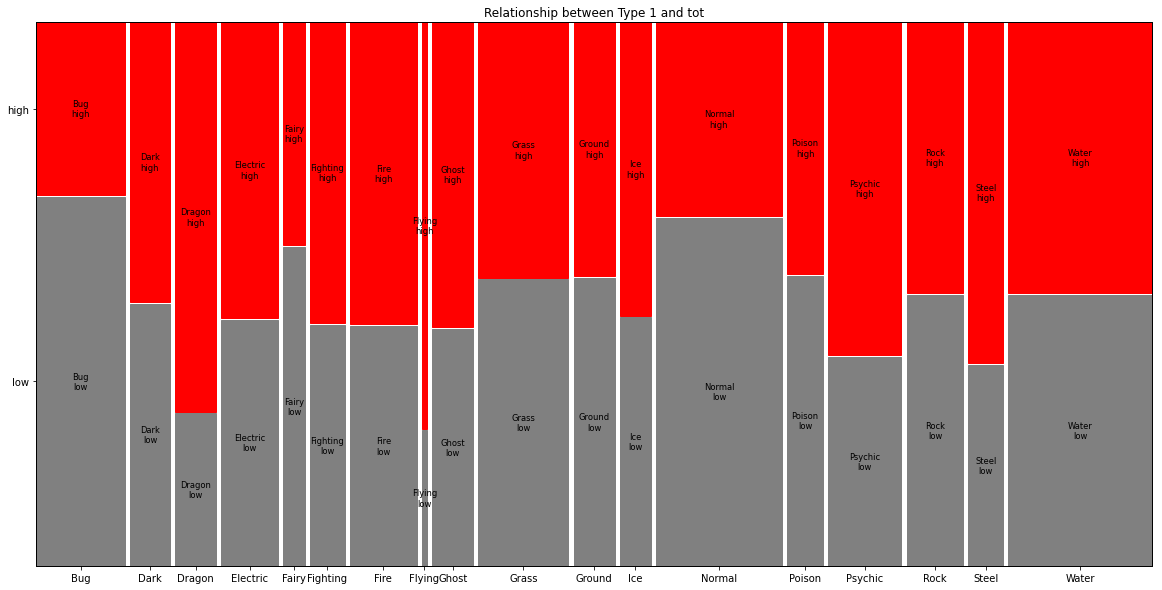

In [177]:
from statsmodels.graphics.mosaicplot import mosaic
def check_type_ability(ability = "tot"):
    # plot the mosaic plot of given ability according to type
    props = lambda key: {'color': 'r' if 'high' in key else 'gray'}
    temp = pokemon
    temp["ability_binary"] = pd.qcut(pokemon[ability], 
                                     q=[0, 0.5, 1], 
                                     labels=["low", "high"]) 
        # cut the whole ability score into two labels according to the median 
        # (50 percentile)
    t = mosaic(pokemon, 
               ['Type 1', "ability_binary"], 
               title=f'Relationship between Type 1 and {ability}',
               properties=props)
    t[0].set_size_inches(20,10)
    
check_type_ability() # example of tot ability score

From the masasic plot, we can see that `Dragon` type Pokemon has a distinctly longer red part than the others, indicating that it normally has higher overall ability scores `tot`.

We can also perform such an analysis on the other abilities (emitted here).

#### Conclusion and summary

From above three types of analysis, I personally thought that the violin plot reflects the characteristics of ability score best. Hence we then adopt the **violin plot** (also for the later parts in this assignment) and make the following summaries and conclusions.

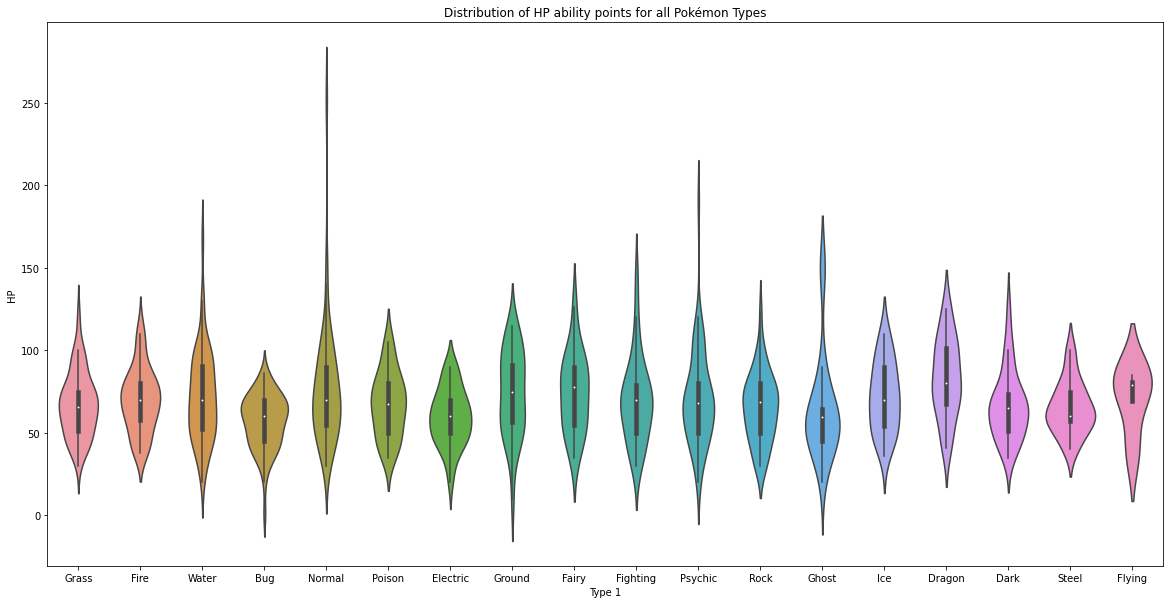

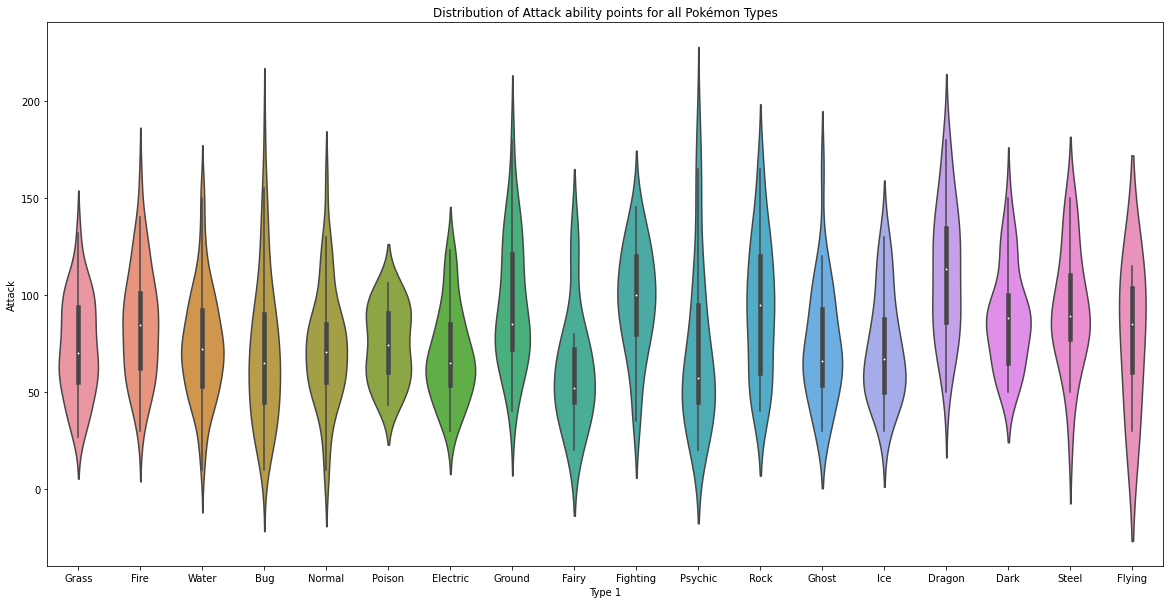

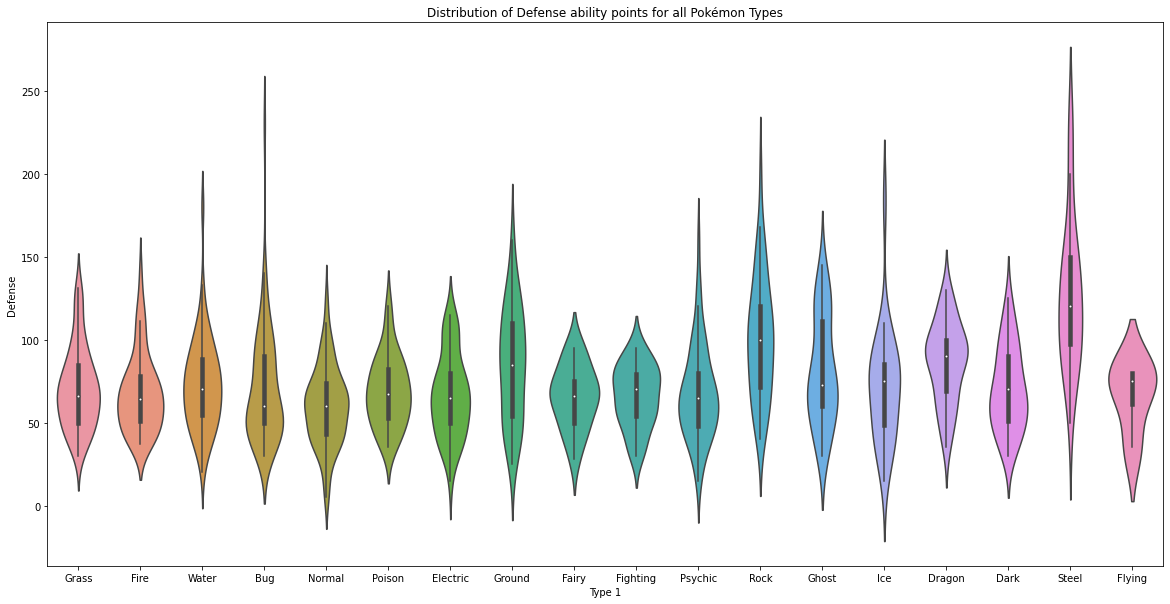

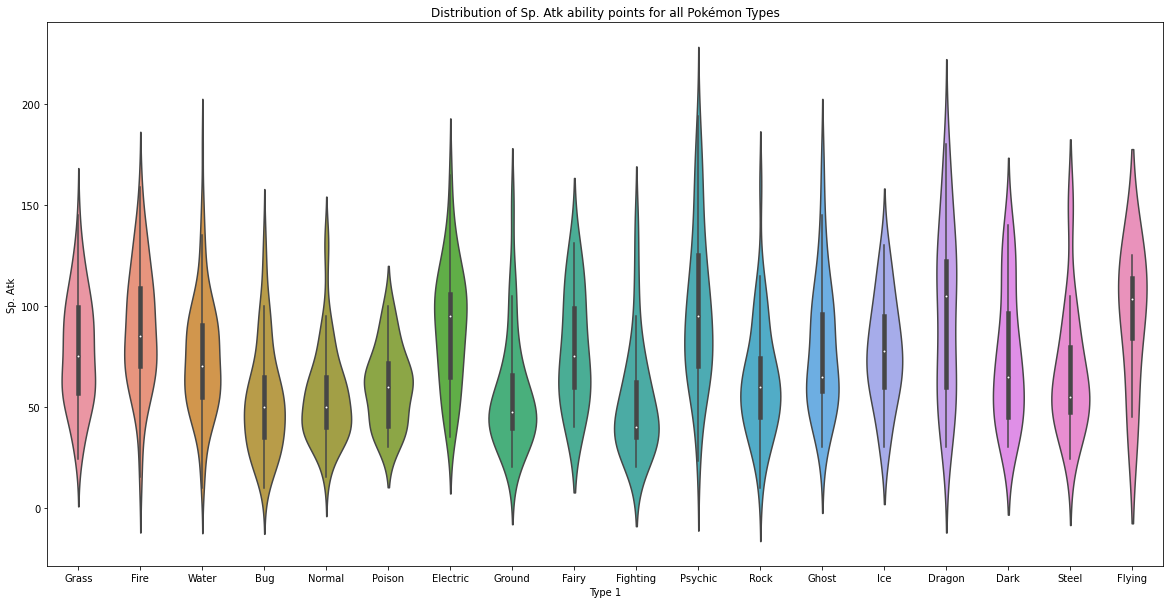

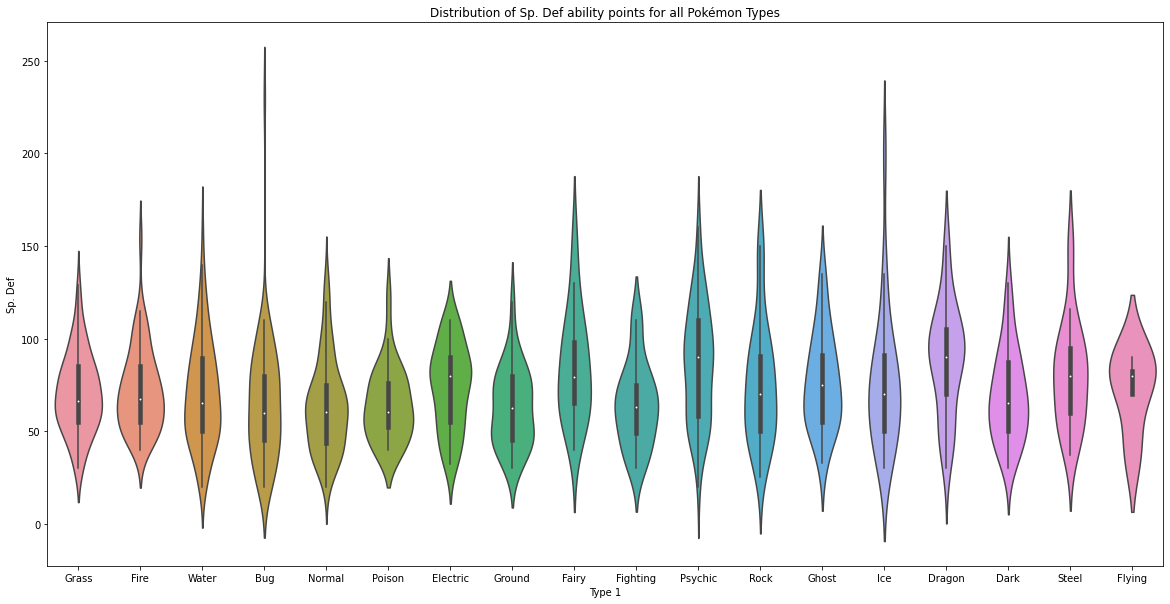

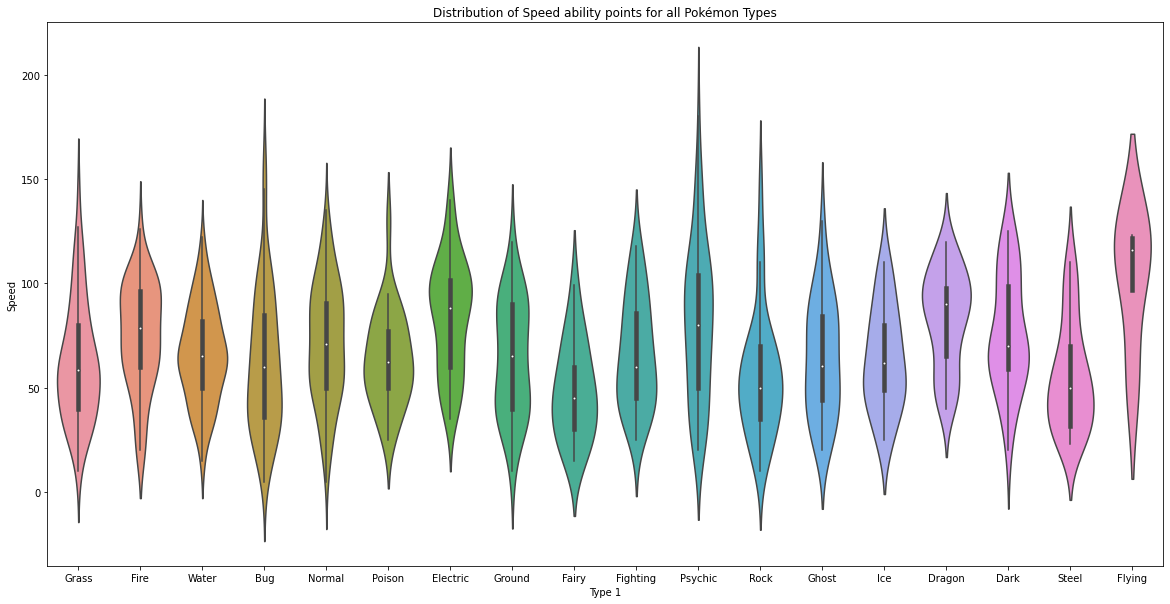

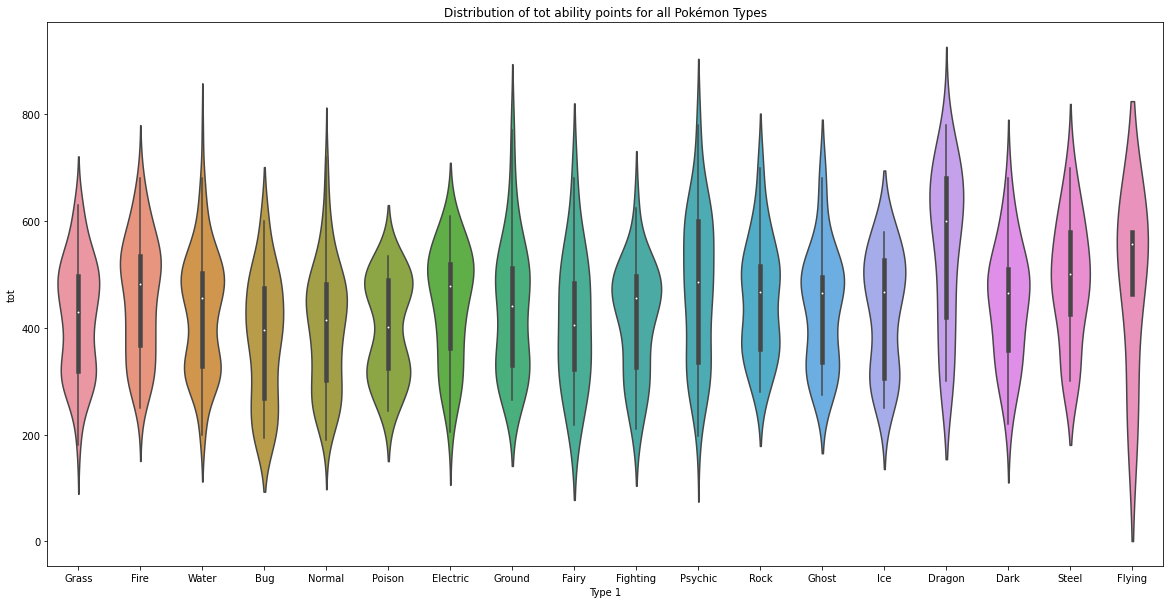

In [178]:
for ab in ability_tot_list:
    ability_dist_all_types_violin(ab)

In [179]:
# helper chunk
statistic_table = pokemon.groupby("Type 1").mean()[ability_tot_list]
for ab in ability_tot_list:
    max_type_index = np.argmax(statistic_table[ab])
    min_type_index = np.argmin(statistic_table[ab])
#     print(f"For ability `{ab}`, `{statistic_table.index[max_type_index]}` type has the highest average points while the `{statistic_table.index[min_type_index]}` type has the lowest average points.")

# statistic_table

According to the violin plots and table `statistic_table` above, we can make the following abservations:
+ For ability `HP`, `Dragon` type has the highest average points while the `Bug` type has the lowest average points.
+ For ability `Attack`, `Dragon` type has the highest average points while the `Fairy` type has the lowest average points.
+ For ability `Defense`, `Steel` type has the highest average points while the `Normal` type has the lowest average points.
+ For ability `Sp. Atk`, `Psychic` type has the highest average points while the `Fighting` type has the lowest average points.
+ For ability `Sp. Def`, `Dragon` type has the highest average points while the `Ground` type has the lowest average points.
+ For ability `Speed`, `Flying` type has the highest average points while the `Fairy` type has the lowest average points.
+ For ability `tot`, `Dragon` type has the highest average points while the `Bug` type has the lowest average points.

### Q3. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?
* Plot the distributions of abilities in different generations. Compare the results and explain your findings in 4-5 sentences.

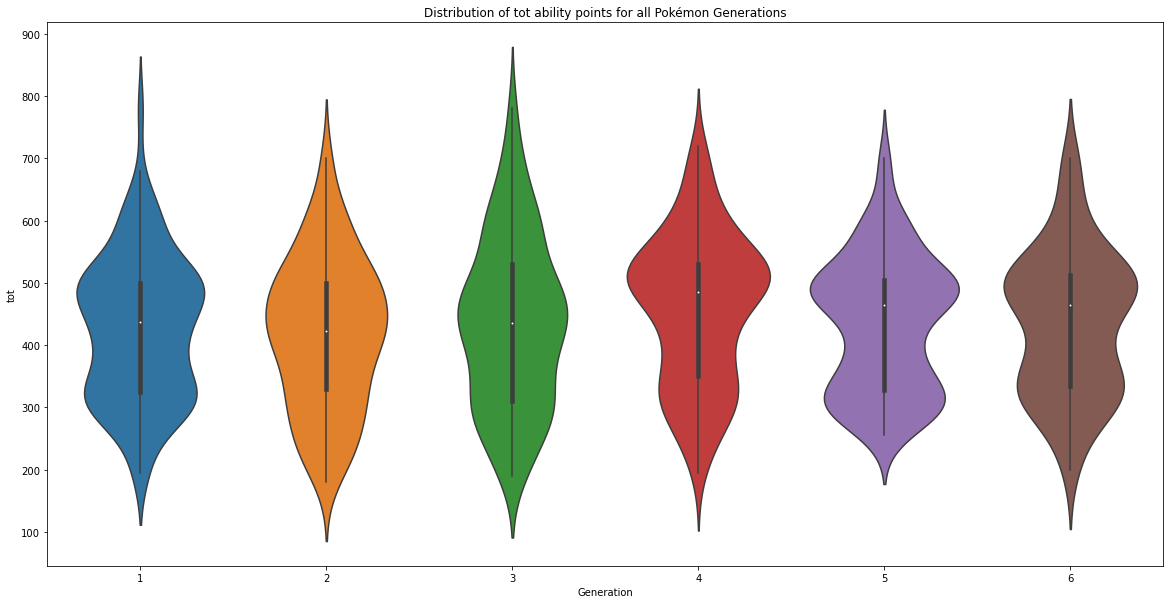

In [180]:
def ability_dist_all_genrations(ability = "tot"):
    # plot the distribution of a given ability points for all Pokemon types with violin plot
    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x="Generation", y=ability, data=pokemon)
    ax.set_title(f"Distribution of {ability} ability points for all Pokémon Generations")
    
ability_dist_all_genrations()

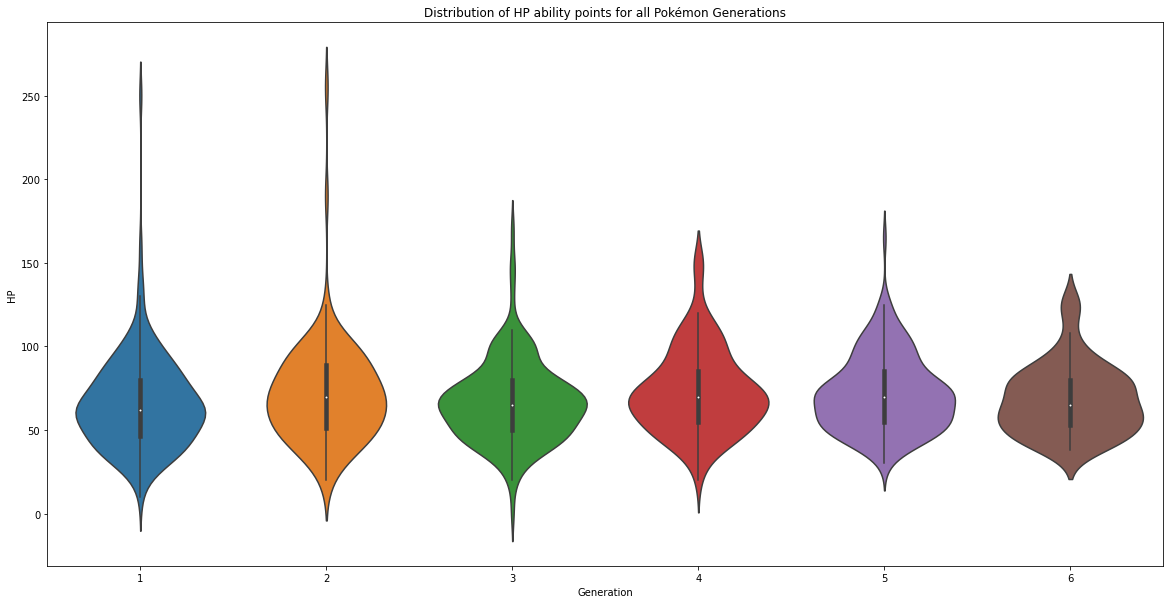

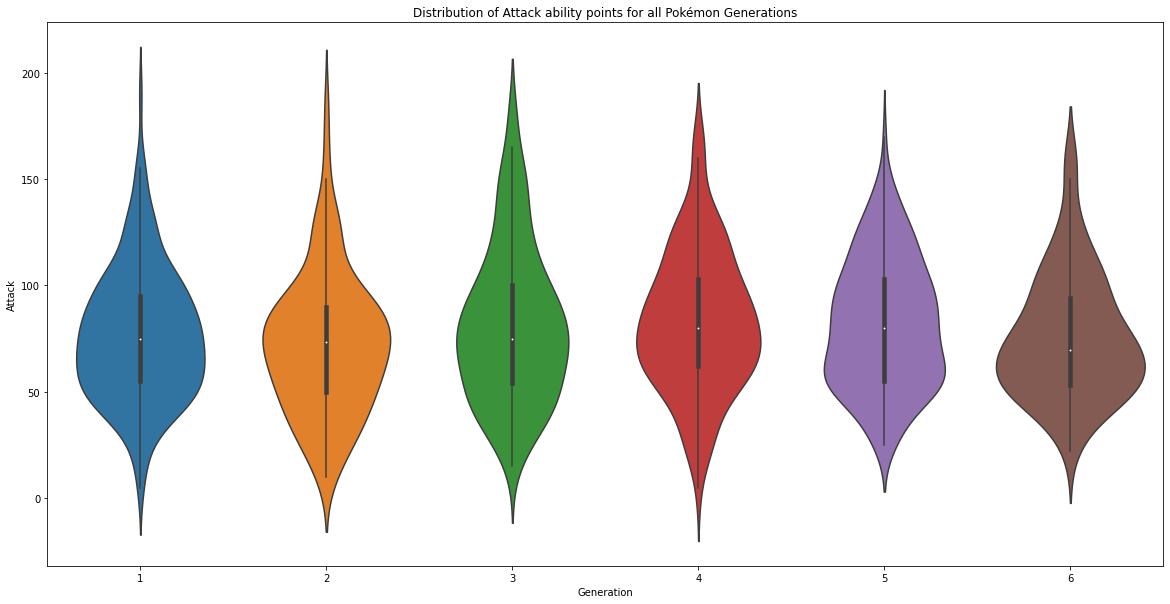

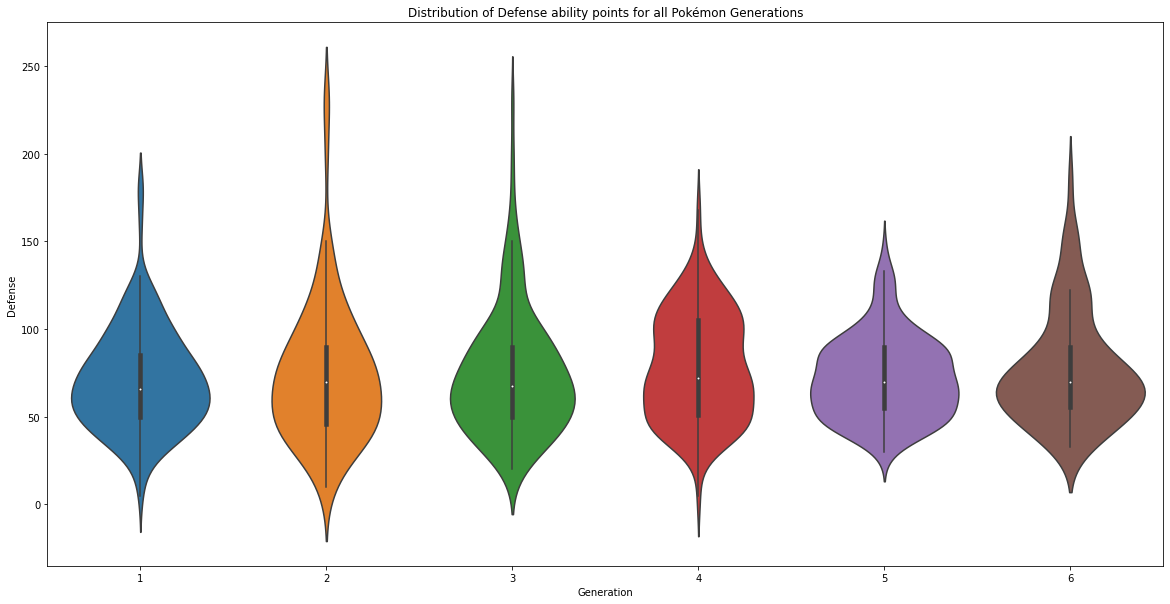

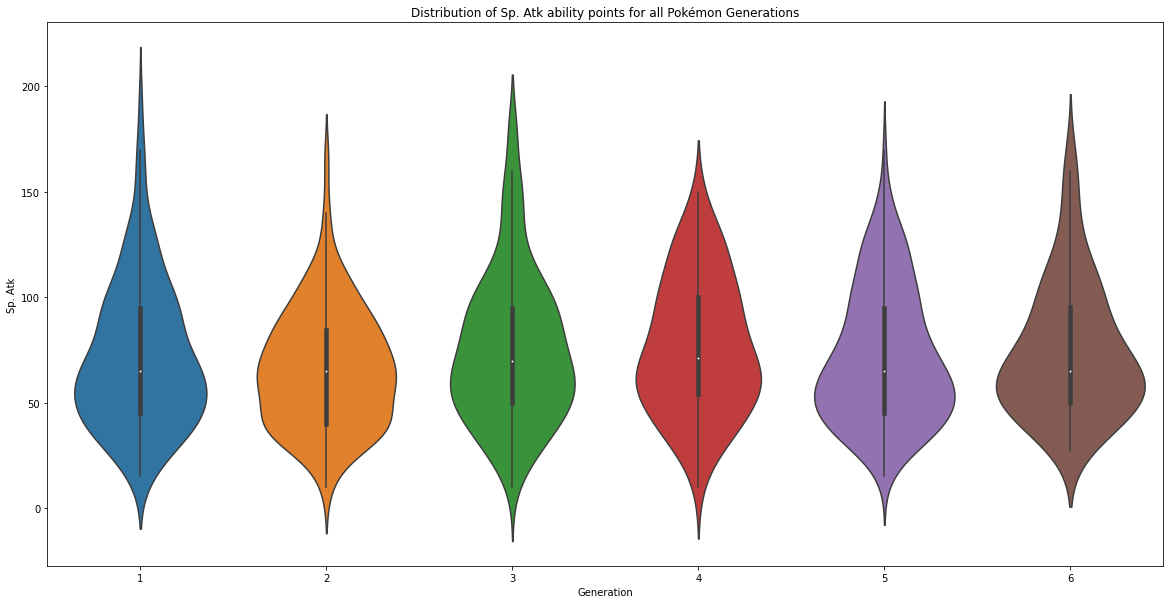

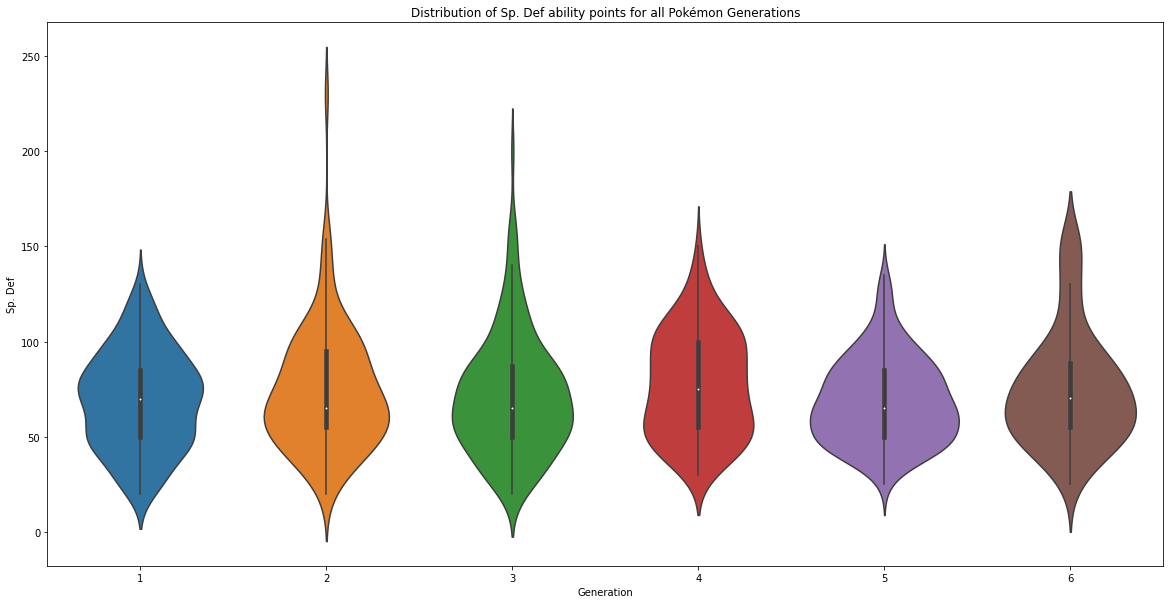

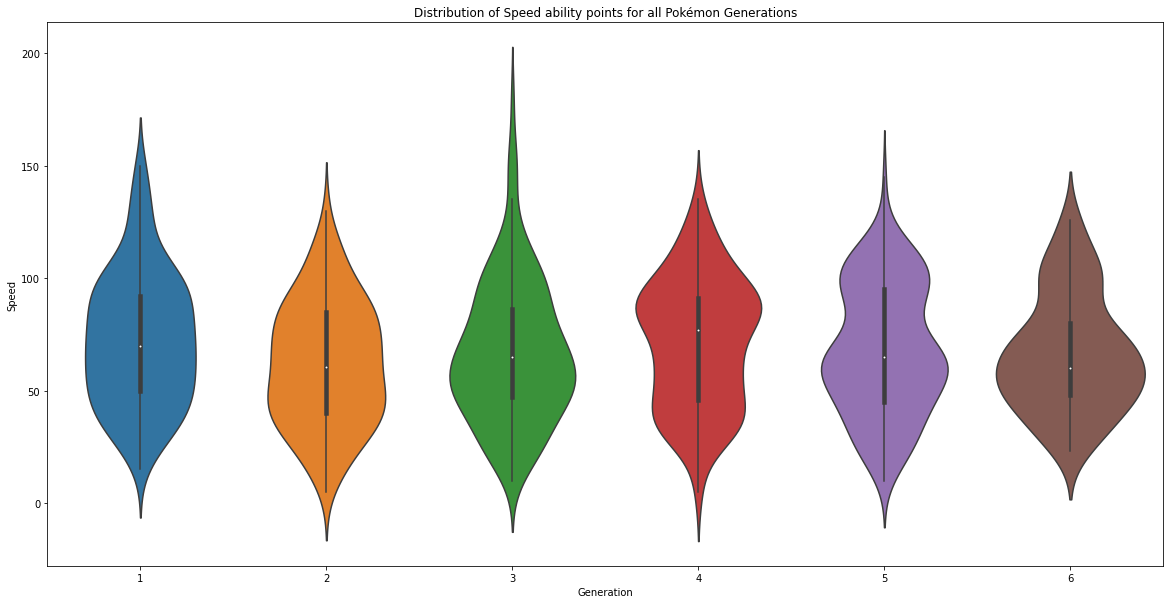

In [181]:
for ab in ability_list:
    ability_dist_all_genrations(ab)

In [182]:
# helper chunk
statistic_table = pokemon.groupby("Generation").mean()
for ab in ability_tot_list:
    max_type_index = np.argmax(statistic_table[ab])
    min_type_index = np.argmin(statistic_table[ab])
#     print(f"+ For ability `{ab}`, Generation {statistic_table.index[max_type_index]} has the highest average points while the generation {statistic_table.index[min_type_index]} has the lowest average points.")

# statistic_table

#### Answer

1. According to the violin plots above, I think designers of Pokémon did not try to address different distributions of ability points in different generations (since the distribution of the same ability appear to be the same / with the same shape). However, it seems that they slightly increase the ability points in later generation (since there is a raising tendency for the total ability points).

2. With the distuibution plots from the violin plots above, we can we can make the following abservations from the result:

+ For ability `HP`, Generation 4 has the highest average points while the generation 1 has the lowest average points.
+ For ability `Attack`, Generation 4 has the highest average points while the generation 2 has the lowest average points.
+ For ability `Defense`, Generation 4 has the highest average points while the generation 1 has the lowest average points.
+ For ability `Sp. Atk`, Generation 4 has the highest average points while the generation 2 has the lowest average points.
+ For ability `Sp. Def`, Generation 4 has the highest average points while the generation 5 has the lowest average points.
+ For ability `Speed`, Generation 1 has the highest average points while the generation 2 has the lowest average points.
+ For ability `tot`, Generation 4 has the highest average points while the generation 2 has the lowest average points.

And here is my findings:
+ For the same ability, the distribution appears to be the same for different generations
+ The 4th generation seems to have the highest average points in almost all abilities. 
+ The 2nd generation has the lowest average points for most abilities.

### Q4. For 15 points: Compare the distribution of the overall ability score of regular pokemon and legendary pokemon over  different generations using a suitable figure (Hint: We used this type of figure in the lab)

* What can you say about the odds of winning in an encounter between a regular pokemon and a legendary pokemon in general?
* Is there a trend in this relationship over generations?

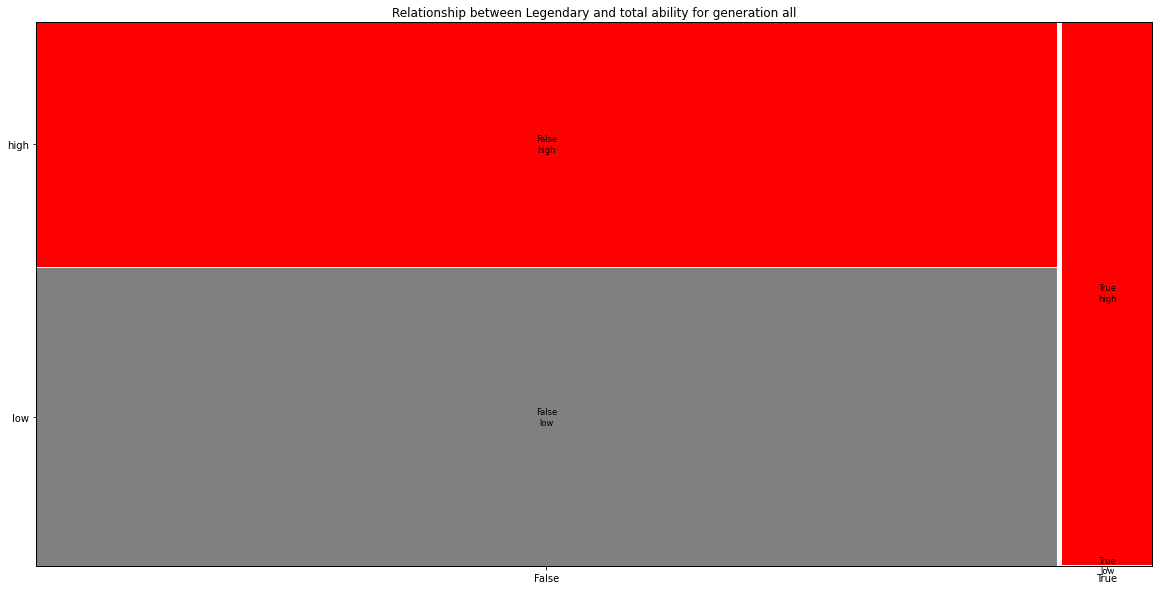

In [183]:
def ability_dist_for_legenary_mosaic(generation = "all"):
    if generation == "all":
        temp = pokemon
    else:
        temp = pokemon[pokemon["Generation"] == generation]
    props = lambda key: {'color': 'r' if 'high' in key else 'gray'}
    temp["tot_binary"] = pd.qcut(temp["tot"], 
                                 q=[0, 0.5, 1], 
                                 labels=["low", "high"]) 
        # cut the whole ability score into two labels according to the median (50 percentile)
    t = mosaic(temp, 
               ['Legendary', "tot_binary"], 
               title=f'Relationship between Legendary and total ability for generation {generation}',
               properties=props)
    t[0].set_size_inches(20,10)
    
ability_dist_for_legenary_mosaic()

In [184]:
# Monte-Carlo for question 1
import random
from random import sample
random.seed(10)
lpokemon = pokemon[pokemon["Legendary"] == True] # legendary pokemon
rpokemon = pokemon[pokemon["Legendary"] == False] # regular pokemon

n = 10000
count = 0
for i in range(n):
    if float(lpokemon.sample()["tot"]) < float(rpokemon.sample()["tot"]):
        count += 1
    
print(f"odds of winning of a regular pokemon v.s. a legendary pokemon {count / n}")

odds of winning of a regular pokemon v.s. a legendary pokemon 0.0242


<ipython-input-183-99a747df6bb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["tot_binary"] = pd.qcut(temp["tot"],
<ipython-input-183-99a747df6bb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["tot_binary"] = pd.qcut(temp["tot"],
<ipython-input-183-99a747df6bb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

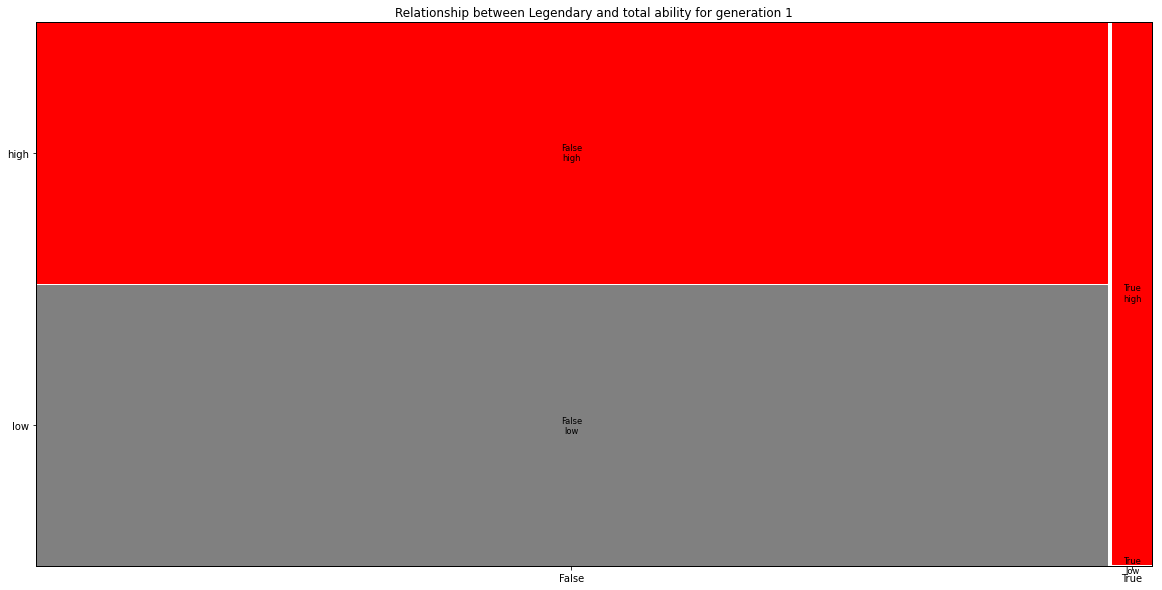

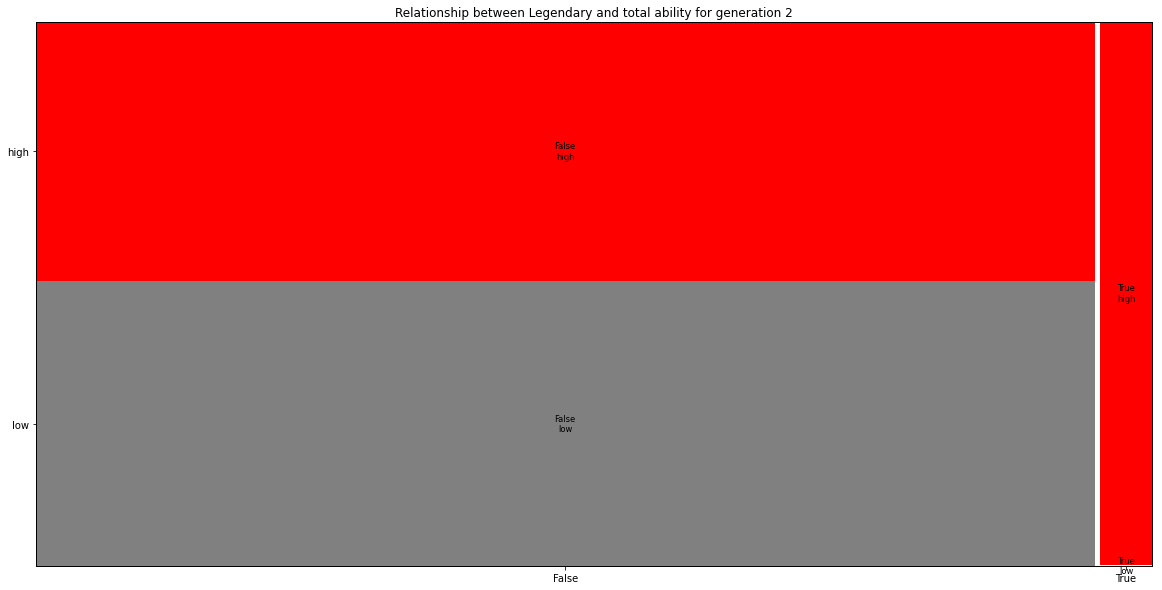

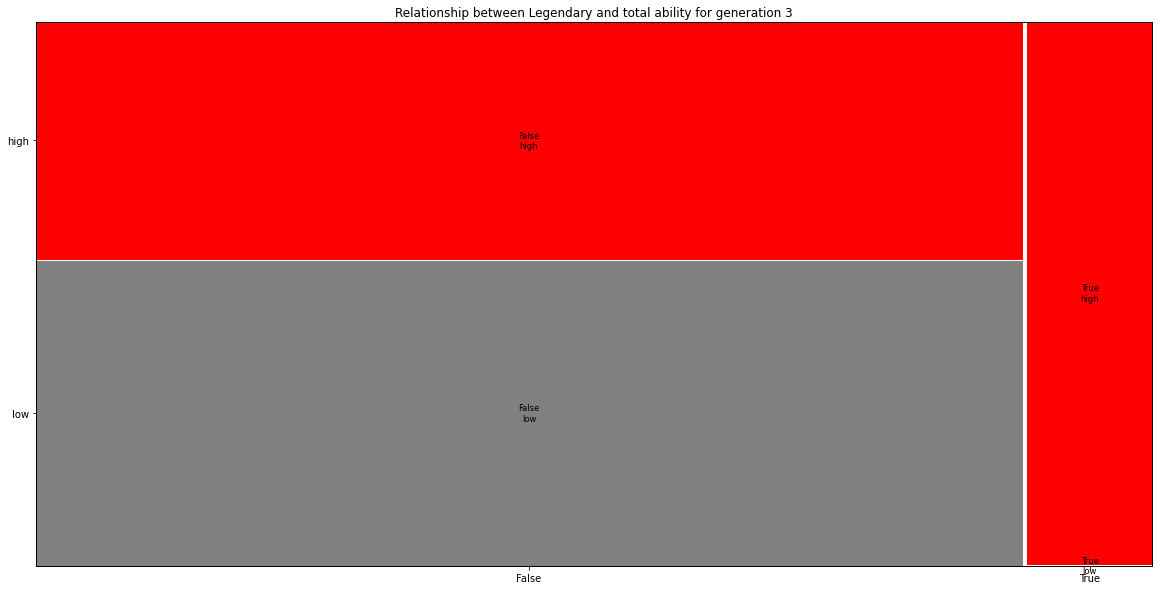

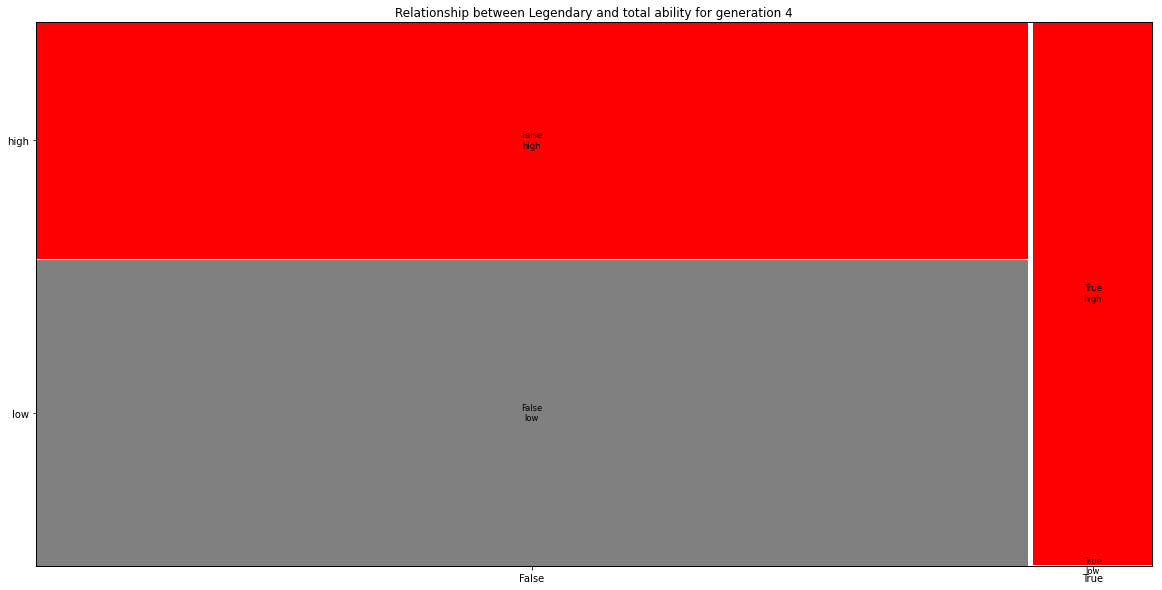

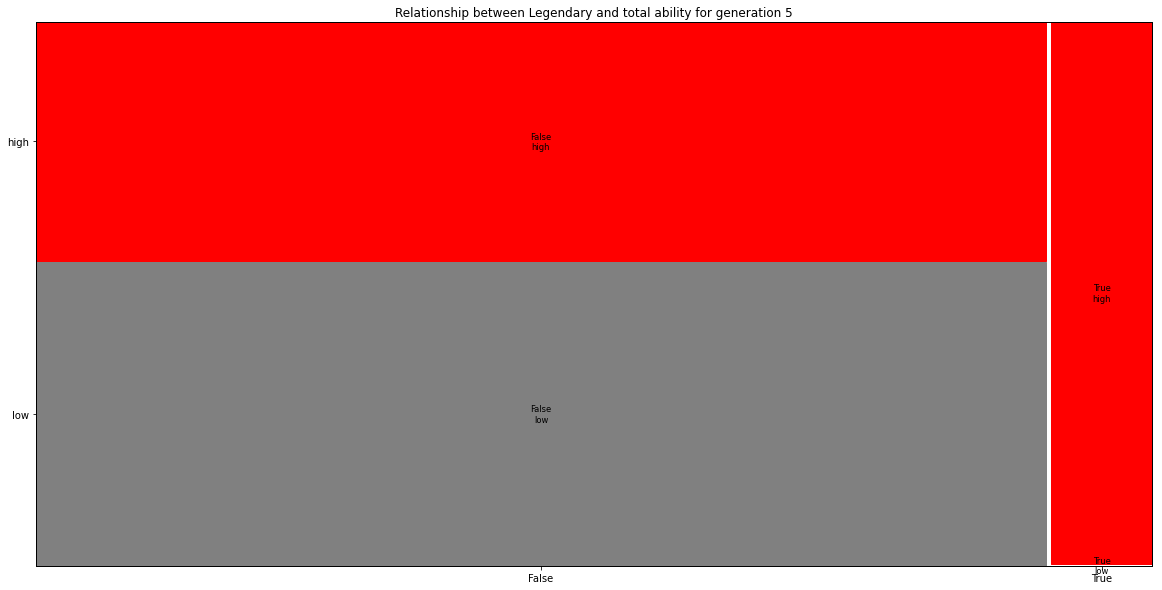

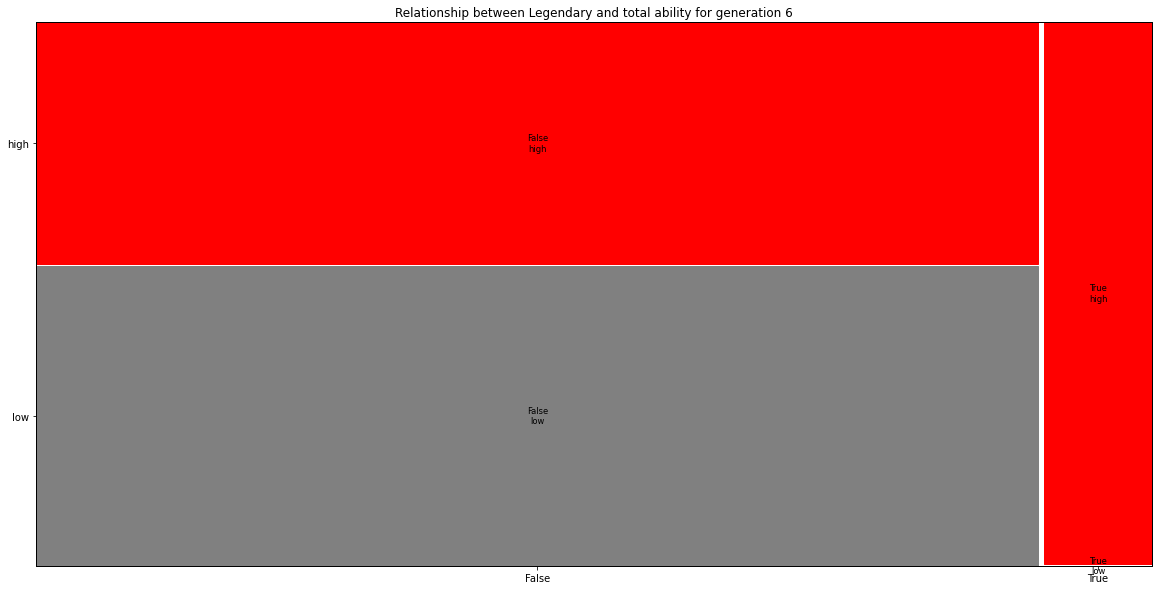

In [185]:
# trend over generations for question 2
for i in range(6):
    ability_dist_for_legenary_mosaic(i+1)

#### Answer

1. The odds of winning between the a regular pokemon and a legendary pokemon are nearly 0 (since almost all of the legendary pokemons are of high total values). With the Monte-Carlo method, we can easily verify that.

2. Yes. The trend of the fact that a legendary pokemon has higher ability score than a regular pokemon maintains over all 6 generations.

### Q5. For 10 points: Let's explore whether the designers prefer certain types of pokemon when assigning legendary status using the tools you've learnt for categorical variable relationships. Analyse Type 1 and Type 2 separately w.r.t legendary status. What are your observations?

In [220]:
ct1 = pd.crosstab(pokemon["Type 1"], pokemon["Legendary"])
ct1["tot"] = [r[False] + r[True] for i, r in ct1.iterrows()]
ct1["F_percent(%)"] = [r[False] / r["tot"] * 100 for i, r in ct1.iterrows()]
ct1["T_percent(%)"] = [r[True] / r["tot"] * 100 for i, r in ct1.iterrows()]
ct1

Legendary,False,True,tot,F_percent(%),T_percent(%)
Type 1,,,,,
Bug,69,0,69,100.000000,0.000000
Dark,29,2,31,93.548387,6.451613
Dragon,20,12,32,62.500000,37.500000
Electric,40,4,44,90.909091,9.090909
Fairy,16,1,17,94.117647,5.882353
Fighting,27,0,27,100.000000,0.000000
Fire,47,5,52,90.384615,9.615385
Flying,2,2,4,50.000000,50.000000
Ghost,30,2,32,93.750000,6.250000


In [223]:
ct2 = pd.crosstab(pokemon["Type 2"], pokemon["Legendary"])
ct2["tot"] = [r[False] + r[True] for i, r in ct2.iterrows()]
ct2["F_percent(%)"] = [r[False] / r["tot"] * 100 for i, r in ct2.iterrows()]
ct2["T_percent(%)"] = [r[True] / r["tot"] * 100 for i, r in ct2.iterrows()]
ct2

Legendary,False,True,tot,F_percent(%),T_percent(%)
Type 2,,,,,
Bug,3,0,3,100.000000,0.000000
Dark,19,1,20,95.000000,5.000000
Dragon,14,4,18,77.777778,22.222222
Electric,5,1,6,83.333333,16.666667
Fairy,21,2,23,91.304348,8.695652
Fighting,22,4,26,84.615385,15.384615
Fire,9,3,12,75.000000,25.000000
Flying,84,13,97,86.597938,13.402062
Ghost,13,1,14,92.857143,7.142857


#### Answer

From the cross tables above, we have the following observations:
+ For Type 1, 
    + if we only consider the absolute number, the designers prefer types `Dragon` and `Psychic` of pokemon when assigning legendary status (since they have more legendary pokemons than others); 
    + If we consider the proportion, the designers prefer types `Flying` of pokemon most when assigning legendary status.

+ For Type 2, 
    + if we only consider the absolute number, the designers prefer types `Flying` of pokemon when assigning legendary status; 
    + If we consider the proportion, the designers prefer types `Fire` of pokemon most when assigning legendary status.

### Q6. For 30 points: Let's try to more concretly analyse if the odds of a legendary pokemon winning was related to the generation they were introduced in. Load the combat encounter dataset and join it with the pokemon dataset to identify the generation and legendary status of each pokemon in an encounter. Considering encounters between legendary pokemon introduced in a given generation and regular pokemon of any generation, create a cross tabulation of generation against the wins/losses of legendary pokemon.
* Are there *statistically significant* differences in the odds of a legendary pokemon winning based on the generation it was introduced in? ($\alpha=0.05$). What do you observe?
* Does this remain true if we limit the encounters to pokemon introduced in the same generation?

#### question 1

In [241]:
# cross tabulation
lpokemon_index = pokemon[pokemon["Legendary"] == True].index
rpokemon_index = pokemon[pokemon["Legendary"] == False].index
combats["is_first_lengendary"] = [p in lpokemon_index for p in combats["First_pokemon"]]
combats["is_second_lengendary"] = [p in lpokemon_index for p in combats["Second_pokemon"]]
combats["is_LvsR"] = [f + s == 1 for f, s in zip(combats["is_first_lengendary"], combats["is_second_lengendary"])]

def get_cross_tab(data = combats):
    combats_LvsR = data[data["is_LvsR"]]
    is_lengendary_win = []
    lengendary_pokemon_generation = []
    for index, row in combats_LvsR.iterrows():
        # record the generation for regular pokemon
        lpoke = "First_pokemon" if row["is_first_lengendary"] else "Second_pokemon"
        lengendary_pokemon_generation.append(pokemon.loc[row[lpoke]]["Generation"])
        win = 1 if row["Winner"] == row["First_pokemon"] else 2
        if (win == 1 and row["is_first_lengendary"] == True) or \
           (win == 2 and row["is_second_lengendary"] == True): # the lengendary win
            is_lengendary_win.append(True)
        else: # the lengendary lose
            is_lengendary_win.append(False)
    
    combats_LvsR["is_lengendary_win"] = is_lengendary_win
    combats_LvsR["lengendary_pokemon_generation"] = lengendary_pokemon_generation
    ct = pd.crosstab(combats_LvsR["is_lengendary_win"], 
                     combats_LvsR["lengendary_pokemon_generation"])
    return ct

ct = get_cross_tab()
ct

<ipython-input-241-08f61a91edfd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_LvsR["is_lengendary_win"] = is_lengendary_win
<ipython-input-241-08f61a91edfd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_LvsR["lengendary_pokemon_generation"] = lengendary_pokemon_generation


lengendary_pokemon_generation,1,2,3,4,5,6
is_lengendary_win,,,,,,
False,110,99,473,283,232,265
True,640,437,1570,1280,1452,649


In [242]:
# significant test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  118.34353248919223
p-val =  7.03924549599666e-24
degree of freedom =  5
Expected:


,0,1,2,3,4,5
0,146.395194,104.623765,398.780507,305.087583,328.706008,178.406943
1,603.604806,431.376235,1644.219493,1257.912417,1355.293992,735.593057


#### question 2

In [243]:
# if limit the encounters to pokemon introduced in the same generation
combats["First_generation"] = [pokemon.loc[f]["Generation"] for f in combats["First_pokemon"]]
combats["Second_generation"] = [pokemon.loc[s]["Generation"] for s in combats["Second_pokemon"]]
combats_same = combats[combats["First_generation"] == combats["Second_generation"]]
ct = get_cross_tab(combats_same)
ct

<ipython-input-241-08f61a91edfd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_LvsR["is_lengendary_win"] = is_lengendary_win
<ipython-input-241-08f61a91edfd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_LvsR["lengendary_pokemon_generation"] = lengendary_pokemon_generation


lengendary_pokemon_generation,1,2,3,4,5,6
is_lengendary_win,,,,,,
False,28,10,88,47,56,18
True,124,45,321,195,290,77


In [244]:
# significant test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  3.546600719592524
p-val =  0.6163483767305641
degree of freedom =  5
Expected:


,0,1,2,3,4,5
0,28.902232,10.458045,77.769823,46.015396,65.790608,18.063895
1,123.097768,44.541955,331.230177,195.984604,280.209392,76.936105


#### Answer

1. According to the test result above, since p-value < $\alpha$, we have enough evidence to accept the null hypothesis, indicating that it is statistically significant differences in the odds of a legendary pokemon winning based on the generation it was introduced in.

2. If we limit the encounters to pokemon introduced in the same generation, we can see that p-value is greatly larger than $\alpha$, i.e. p-value > $\alpha$. It indicates that we have no enough evidence to accept the null hypothesis so that it is not statistically significant differences in the odds of a legendary pokemon winning based on the generation it was introduced in. Hence the original statement no longer holds.

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both uniquename_si618_hw8.ipynb and uniqname_si618_hw8.html SEPARATELY on canvas</font>